In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from IPython.display import Image
from scipy.integrate import odeint
from scipy.integrate import ode

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. Write a fourth-order fixed-time-step Runge-Kutta integrator from scratch. Inputs should consist of a starting time $t_0$, time step $\Delta t$, number of steps $n$, and starting value $\vec{x}(t_0)$ for the state vector. If your language allows functions as arguments, make the system derivative an argument as well. The output of this procedure - a series of state vectors representing the $n$-point state-space trajectory emenating from $\vec{x}(t_0)$ - should go to a file.**

[Wikipedia Reference Link](http://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

In [3]:
def runge_kutta(f, t0, y0, dt, n, writecsv=False):
    dim = y0.size
    
    # Establish blank solution trajectory
    # [[y00, ..., y0n, t0],
    #  [y10, ..., y1n, t1],
    # ...]
    traj = np.zeros((n + 1, dim + 1), dtype=np.float64)
    
    # Set initial position
    traj[0, 0:dim] = y0
    traj[0, -1]    = t0

    # Iterate
    for i in range(1, n + 1):
        k1 = f(traj[i - 1, -1]           , traj[i - 1, 0:dim])
        k2 = f(traj[i - 1, -1] + (dt / 2), traj[i - 1, 0:dim] + (k1 * dt / 2))
        k3 = f(traj[i - 1, -1] + (dt / 2), traj[i - 1, 0:dim] + (k2 * dt / 2))
        k4 = f(traj[i - 1, -1] + dt      , traj[i - 1, 0:dim] + k3 * dt)
        
        # y
        traj[i, 0:dim] = (traj[i - 1, 0:dim] + dt *
                        ((k1 / 6) + (k2 / 3) +
                         (k3 / 3) + (k4 / 6)))
        # t
        traj[i, -1] = traj[i - 1, -1] + dt

    if writecsv:
        with open('rungekuttasteps.csv', 'w') as f:
            csvwriter = csv.writer(f)
            [csvwriter.writerow(line) for line in traj]
    return traj

**The rest of the problems in this set concern the following equation:**

$$
m l \theta^{\prime\prime}(t) + \beta l \theta^\prime(t) + mg \sin \theta (t) = A \cos(\alpha t)
$$

**This is the equation of motion of a forced, damped pendulum. The state vetor is ${[\theta, \omega]}^T$; the former is in radians, while the latter is in rad/s. Use your RK4 solver.**

**2. Use $m=0.1kg$, $l = 0.1m$, $\beta = 0$, and set the drive amplitude and frequency to zero ($\alpha = A = 0$).**

**(a) Turn in a plot of the state-space trajectory emanating from the point $[\theta, \omega] = [3, 0.1]$ with $\Delta t = 0.005$. Is this initial condition neat an equilibrium point? Which one? Is that point stable or unstable?**

We first rewrite our equation as the following using the substitutions $\theta^{\prime\prime} = P(\theta, \omega, t)$, and $\theta^\prime = \omega$.

Note that $\theta$ and its derivatives are functions of time, however for this first part time remains constant and is therefore ignored.

$$
P(\theta, \omega, t) = \frac{A \cos(\alpha t)}{ml} - \frac{\beta \omega}{m} - \frac{g \sin(\theta)}{l}
$$

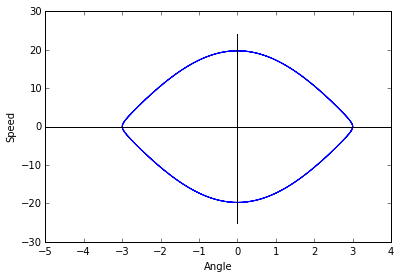

In [4]:
m     = 0.1
l     = 0.1
b     = 0.0
alpha = 0.0
A     = 0.0
g     = 9.8

# [Angle, Speed]
initial_state = np.array([3, 0.1], dtype=np.float64)
dt = 0.005

# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = runge_kutta(pendulum, 0, initial_state, dt, 1000)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(data[:, 0], data[:, 1])
ax.plot(np.arange(-5, 5, 1), np.zeros(10), 'k-')
ax.plot(np.zeros(50), np.arange(-25, 25, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

Please reference Appendix (A) as well. I've used online code to sanity check my results, as well as built in libraries.

Our initial point (according to the solver) is on a stable orbit.

**(B) Turn in a plot of the state-space trajectory emanating from the point $[\theta, \omega] = [0.01, 0]$. Does this trajectory look more like a perfect ellipse than the trajectory of part (a)?**

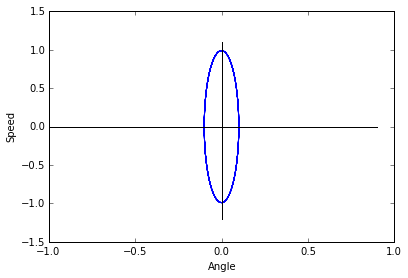

In [23]:
m     = 0.1
l     = 0.1
b     = 0.0
alpha = 0.0
A     = 0.0
g     = 9.8

# [Angle, Speed]
initial_state = np.array([0.1, 0], dtype=np.float64)
dt = 0.005

# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

data = runge_kutta(pendulum, 0, initial_state, dt, 1000)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(data[:, 0], data[:, 1])
ax.plot(np.arange(-1, 1, 0.1), np.zeros(20), 'k-')
ax.plot(np.zeros(24), np.arange(-1.2, 1.2, 0.1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

This graph is also on a stable orbit, and does in fact appear to be a more perfect ellipse than in part (a).

**3. Use your integrator to generate a state-space portrait of the system, using the coefficient values given in problem 2.**

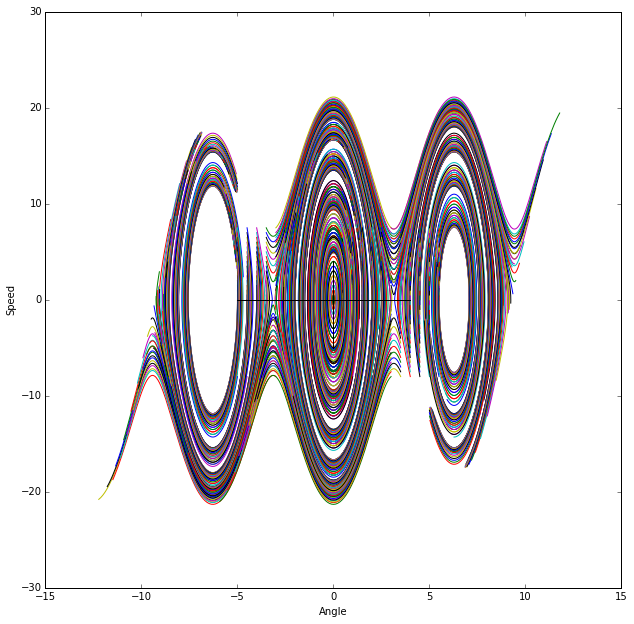

In [13]:
m     = 0.1
l     = 0.1
b     = 0.0
alpha = 0.0
A     = 0.0
g     = 9.8
dt    = 0.005

# [Angle, Speed]
ti = np.arange(-5, 6, 0.5)
oi = np.arange(-8, 8, 0.5)
initial_states = []

for t in ti:
    for o in oi:
        initial_states.append(np.array([t, o], dtype=np.float64))


# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data = runge_kutta(pendulum, 0, state, dt, 130)
    ax.plot(data[:, 0], data[:, 1])
    
ax.plot(np.arange(-5, 5, 1), np.zeros(10), 'k-')
ax.plot(np.zeros(10), np.arange(-5, 5, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

**4. Now repeat problem 3 with $\beta = 0.25$. What happens to the various features of the plot? What does this imply about the physical dynamics? Turn in a copy of this plot. What do you think would happen with higher or lower $\beta$s?**

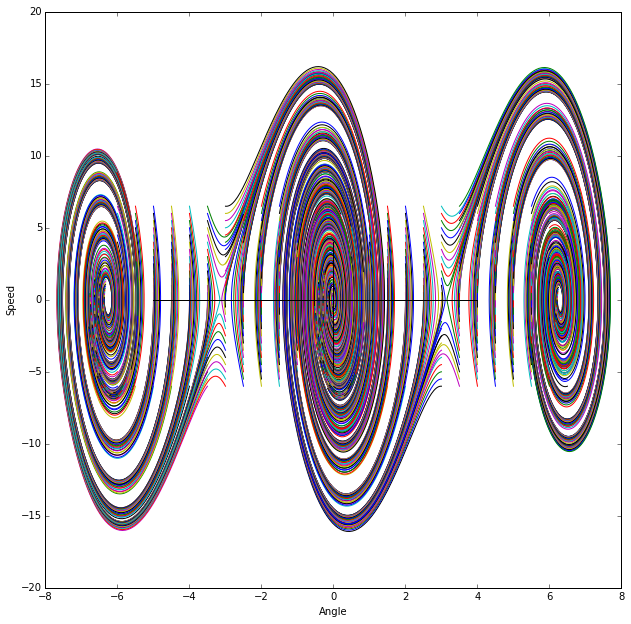

In [14]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 0.0
A     = 0.0
g     = 9.8
dt    = 0.005

# [Angle, Speed]
ti = np.arange(-6, 7, 0.5)
oi = np.arange(-6, 7, 0.5)
initial_states = []

for t in ti:
    for o in oi:
        initial_states.append(np.array([t, o], dtype=np.float64))


# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data = runge_kutta(pendulum, 0, state, dt, 200)
    ax.plot(data[:, 0], data[:, 1])
    
ax.plot(np.arange(-5, 5, 1), np.zeros(10), 'k-')
ax.plot(np.zeros(10), np.arange(-5, 5, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

This increases the acceleration making the speed change at a higher pace. Phrasing differentially, it elongates the ellipses vertically. A higher $\beta$ would elongate these further, while a lower $\beta$ (I think) would squish them down towards the $\theta$-axis.

**5. Modify your code so that it plots $\theta \mod 2 \pi$ and see what that does to your results in problem 4.**

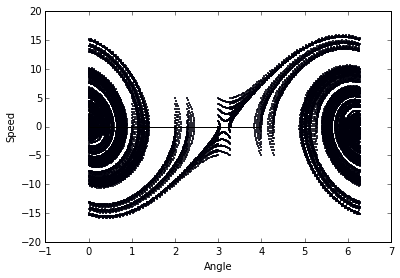

In [15]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 0.0
A     = 0.0
g     = 9.8
dt    = 0.005

# [Angle, Speed]
ti = np.arange(-5, 6, 1)
oi = np.arange(-5, 6, 1)
initial_states = []

for t in ti:
    for o in oi:
        initial_states.append(np.array([t, o], dtype=np.float64))


# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data        = runge_kutta(pendulum, 0, state, dt, 200)
    data[:, 0] %= 2 * np.pi
    ax.scatter(data[:, 0], data[:, 1], s=1)
    
ax.plot(np.arange(0, 5, 1), np.zeros(5), 'k-')
ax.plot(np.zeros(5), np.arange(0, 5, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

It overlays one side onto the other, as is expected. The horizontal lines are a result of the plotter not understanding that some jump like $[\ldots, 2 \pi, 0, \ldots]$ is not to be graphed. This modulo graphing also demonstrates a deeper pattern in the system.

**6. Leaving $\beta = 0.25$, turn on the drive. Vary the drive frequency $\alpha$ and amplitude $A$ and describe and explain what you see on the plots (using chaotic vocabulary). Find a chaotic trajectory and turn in a plot. Make sure you plot $\theta \mod 2 \pi$.**

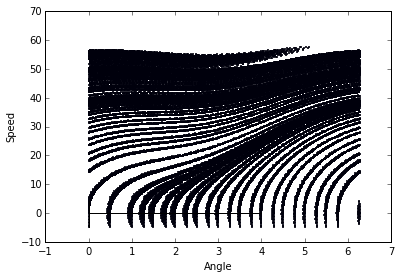

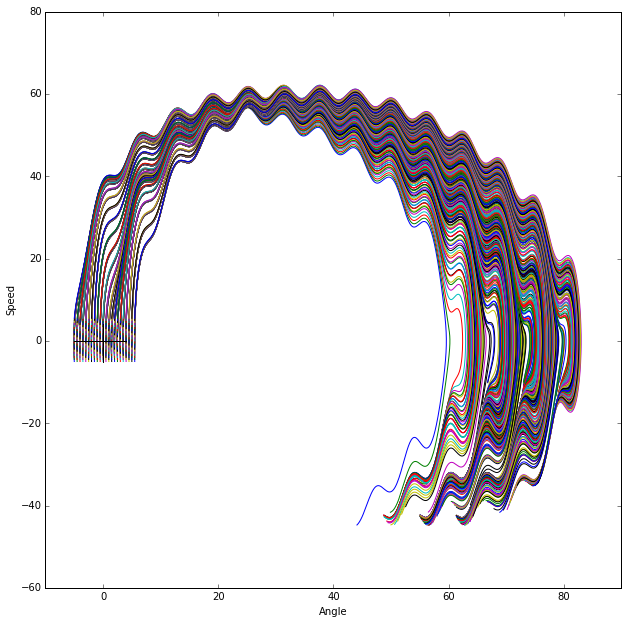

In [26]:
m     = 0.1
l     = 0.1
b     = 0.25
alpha = 1
A     = 2
g     = 9.8
dt    = 0.005

# [Angle, Speed]
ti = np.arange(-5, 6, 0.5)
oi = np.arange(-5, 6, 0.5)
initial_states = []

for t in ti:
    for o in oi:
        initial_states.append(np.array([t, o], dtype=np.float64))


# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data = runge_kutta(pendulum, 0, state, dt, 100)
    ax.scatter(data[:, 0] % (2 * np.pi), data[:, 1], s=1)
    
ax.plot(np.arange(0, 5, 1), np.zeros(5), 'k-')
ax.plot(np.zeros(10), np.arange(-5, 5, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data = runge_kutta(pendulum, 0, state, dt, 500)
    ax.plot(data[:, 0], data[:, 1])

ax.plot(np.arange(-5, 5, 1), np.zeros(10), 'k-')
ax.plot(np.zeros(10), np.arange(-5, 5, 1), 'k-')
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

We definitely have more chaotic behavior here, so much so that it is hard to distinguish characteristics of the plot, however it is clear that the system still has a general pattern to it.

**7. Turn the drive back off, set $\beta = 0$, play with the timestep, and describe the effects.**

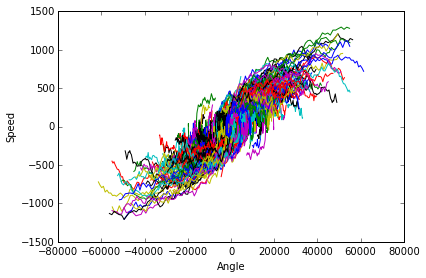

In [511]:
m     = 0.1
l     = 0.1
b     = 0
alpha = 0
A     = 0
g     = 9.8
dt    = 1

# [Angle, Speed]
ti = np.arange(-5, 6, 0.5)
oi = np.arange(-5, 6, 0.5)
initial_states = []

for t in ti:
    for o in oi:
        initial_states.append(np.array([t, o], dtype=np.float64))


# y is a two-parameter array [theta, omega]
pendulum = lambda t, y: np.array([y[1], 
                            (((A * np.cos(alpha * t)) / (m * l)) -
                             ((b * y[1]) / m) -
                             ((g * np.sin(y[0])) / l))])
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for state in initial_states:
    data = runge_kutta(pendulum, 0, state, dt, 100)
    ax.plot(data[:, 0], data[:, 1])
plt.xlabel('Angle')
plt.ylabel('Speed')
plt.show()

As is expected when increasing the timestep dramatically the behavior of the solver is erratic and incorrect. This behavior is a result of the derivative being calculated at some point and then being calculated some point far enough away that the behavior of the system has radically changed since the last point was calculated.